In [4]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.models import load_model

**Defining the Categories**

In [5]:
CATEGORIES = ['no turn', 'speed limit', 'access forbiden', 'no way', 'no parking', 'other']

**Take a sample image**

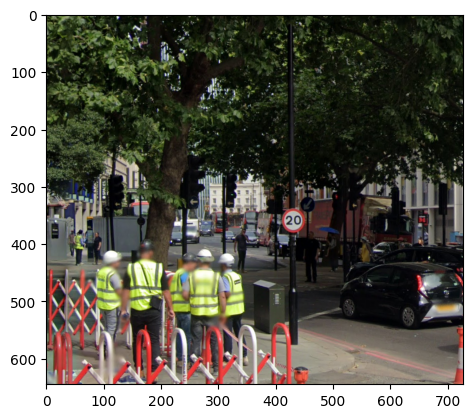

In [6]:
img_bgr = cv2.imread("./../../img/IMG_0108.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


plt.imshow(img_rgb)
plt.show()

In [7]:
# Chat-GPT
def edge_detection(img_bgr):
	"""
	Applies edge detection to an image using Sobel filters.

	Parameters:
	img_bgr: numpy.ndarray
		The input image in BGR format.

	Returns:
	numpy.ndarray
		The edge-detected image.
	"""

	img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


	# Apply the Sobel filters for horizontal and vertical edge detection
	sobel_x = cv2.Sobel(img[:,:,1], cv2.CV_64F, 1, 0, ksize=3)
	sobel_y = cv2.Sobel(img[:,:,1], cv2.CV_64F, 0, 1, ksize=3)


	# Calculate the magnitude of the gradient
	edge_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

	# Normalize the result to an 8-bit scale
	edge_magnitude = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


	return edge_magnitude

In [8]:
def binary_filter(img_bgr):
	"""
	A third method for converting an image to binary format, emphasizing red regions.

	Parameters:
	img_bgr: numpy.ndarray
		The input image in BGR format.

	Returns:
	numpy.ndarray
		The binary image with red regions highlighted.
	"""
	
	img     = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
	img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

	lower_red = np.array([100, 100, 100])
	upper_red = np.array([255, 255, 255])


	# Create a binary mask for the red color within the specified range
	mask = cv2.inRange(img_hsv, lower_red, upper_red)

	# Apply the mask to the original image to segment the red regions
	red_segmented    = cv2.bitwise_and(img, img, mask=mask)
	_, binary_image = cv2.threshold   (red_segmented, red_segmented.mean(), 255, cv2.THRESH_BINARY)


	return binary_image

In [9]:
def blur(img_bgr, kernel_size=5):
    return cv2.GaussianBlur(img_bgr, (kernel_size, kernel_size), 0)

**Binary Filter**
This is our first transformation. My binary filter is converting the image to **hsv** format and applying a mask bounded by 
`[100, 100, 100]` and `[255, 255, 255]`

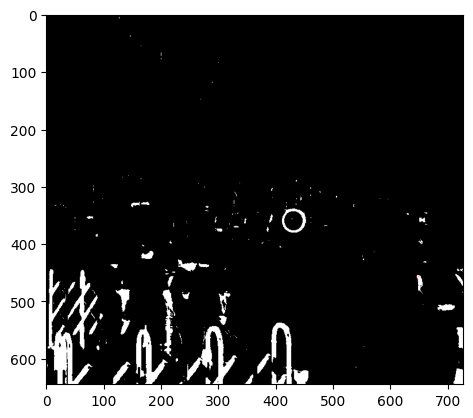

In [10]:
plt.imshow(binary_filter(img_bgr))
plt.show()

**Blur**
It's our second transformation: Blur is a natural process done by a convolutionnal matrix eg:
```
[1/9, 1/9, 1/9]
[1/9, 1/9, 1/9]
[1/9, 1/9, 1/9]
```

It's useful: our shape detector will consider a blurred image rather than a sharpen one. It allows the shape detection to focus more on the pixel **neighbouring** than on a single **pixel**

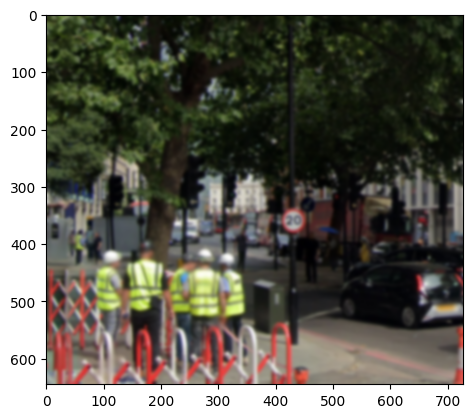

In [14]:
plt.imshow(blur(img_rgb, 15))
plt.show()

Here, we use it on the **red-filtered** image:<br>
The result may not appear clear to our eyes but it's a difference for our model

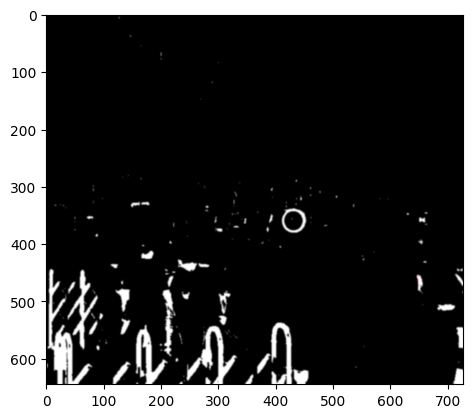

In [15]:
plt.imshow(blur(binary_filter(img_bgr)))
plt.show()